#**PROJECT NAME** : **Movie Genre Classification With NLP**

* In this project, the goal is to examine the text in movie dataset by Using natural language processing (NLP) techniques for text classification to identify different genres for the movie. And train different Machine learning models to predict the genre of the movies based on the text data provided in the dataset.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import nltk
import spacy
import string
sns.set_style('darkgrid')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from textblob import TextBlob

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline # Runing Line by line Tool
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

##Loading Dataset

In [2]:
traindata = pd.read_csv('/content/drive/MyDrive/CodeClause/Project 2/train_data.csv.zip')
testdata = pd.read_csv('/content/drive/MyDrive/CodeClause/Project 2/test_data_solution.csv.zip')

In [3]:
print(traindata.shape)
print(testdata.shape)

(54214, 4)
(54200, 4)


* This datasets are quite big let's analyze only first 5000 movies data.

In [4]:
df_train = traindata.iloc[:5000]
df_test = testdata.iloc[:5000]

## Understanding the Data / Data Inspection / Data Exploration

In [5]:
# Train Dataset
df_train.head()

,Unnamed: 0,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
# Test Dataset
df_test.head()

,Unnamed: 0,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [7]:
# Shape of Datasets
print('Train Dataset: ', df_train.shape)
print('Test Dataset: ', df_test.shape)

Train Dataset:  (5000, 4)
Test Dataset:  (5000, 4)


In [8]:
# Column Names
for i in [df_train, df_test]:
  print(i.columns, '\n')

Index(['Unnamed: 0', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object') 

Index(['Unnamed: 0', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object') 



In [9]:
# Information of Datasets
print(df_train.info(), '\n', '-'*100, '\n')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5000 non-null   int64 
 1   TITLE        5000 non-null   object
 2   GENRE        5000 non-null   object
 3   DESCRIPTION  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
None 
 ---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5000 non-null   int64 
 1   TITLE        5000 non-null   object
 2   GENRE        5000 non-null   object
 3   DESCRIPTION  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
None


## Data Cleaning

In [10]:
# Checking Null Values
for i in [df_train, df_test]:
  print(i.isna().sum(), '\n', '-'*100, '\n')

Unnamed: 0     0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64 
 ---------------------------------------------------------------------------------------------------- 

Unnamed: 0     0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64 
 ---------------------------------------------------------------------------------------------------- 



In [11]:
# There is one irrelavant column to drop

In [12]:
# Checking Duplicates
for i in [df_train, df_test]:
  print(i.duplicated().sum(), '\n')

0 

0 



## Data Formating

In [13]:
# Drop Unnecessary Columns
for i in [df_train, df_test]:
  i.drop('Unnamed: 0', axis= 1, inplace= True)

In [14]:
# Renaming the columns for better readability
for i in [df_train, df_test]:
  i.columns = ['title', 'genre', 'description']

df_test.rename(columns= {'TITLE' : 'title', 'DESCRIPTION' : 'description'}, inplace= True)

In [15]:
# There is no need to change any column's data type.

## Exploratory Data Analysis

In [16]:
# Descriptive Analysis
for i in [df_train, df_test]:
  print(i.describe(include= 'O'), '\n', '-'*100, '\n')

                                 title    genre  \
count                             5000     5000   
unique                            5000       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1     1252   

                                              description  
count                                                5000  
unique                                               4998  
top      Olga, Masha, and Irina Prozoroff lead lonely ...  
freq                                                    2   
 ---------------------------------------------------------------------------------------------------- 

                         title    genre  \
count                     5000     5000   
unique                    5000       27   
top      Edgar's Lunch (1998)    drama    
freq                         1     1314   

                                              description  
count                                                5000  
uni

In [17]:
#Count each genre value
df_train.genre.value_counts()

 drama           1252
 documentary     1198
 comedy           701
 short            470
 horror           189
 thriller         171
 action           121
 western           93
 reality-tv        83
 family            72
 sci-fi            70
 adventure         68
 music             61
 adult             58
 animation         48
 romance           48
 sport             43
 crime             38
 fantasy           33
 talk-show         33
 biography         32
 mystery           31
 history           23
 game-show         19
 musical           19
 news              16
 war               10
Name: genre, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ' drama '),
  Text(1, 0, ' documentary '),
  Text(2, 0, ' comedy '),
  Text(3, 0, ' short '),
  Text(4, 0, ' horror '),
  Text(5, 0, ' thriller '),
  Text(6, 0, ' action '),
  Text(7, 0, ' western '),
  Text(8, 0, ' reality-tv '),
  Text(9, 0, ' family '),
  Text(10, 0, ' sci-fi '),
  Text(11, 0, ' adventure '),
  Text(12, 0, ' music '),
  Text(13, 0, ' adult '),
  Text(14, 0, ' animation '),
  Text(15, 0, ' romance '),
  Text(16, 0, ' sport '),
  Text(17, 0, ' crime '),
  Text(18, 0, ' fantasy '),
  Text(19, 0, ' talk-show '),
  Text(20, 0, ' biography '),
  Text(21, 0, ' mystery '),
  Text(22, 0, ' history '),
  Text(23, 0, ' game-show '),
  Text(24, 0, ' musical '),
  Text(25, 0, ' news '),
  Text(26, 0, ' war ')])

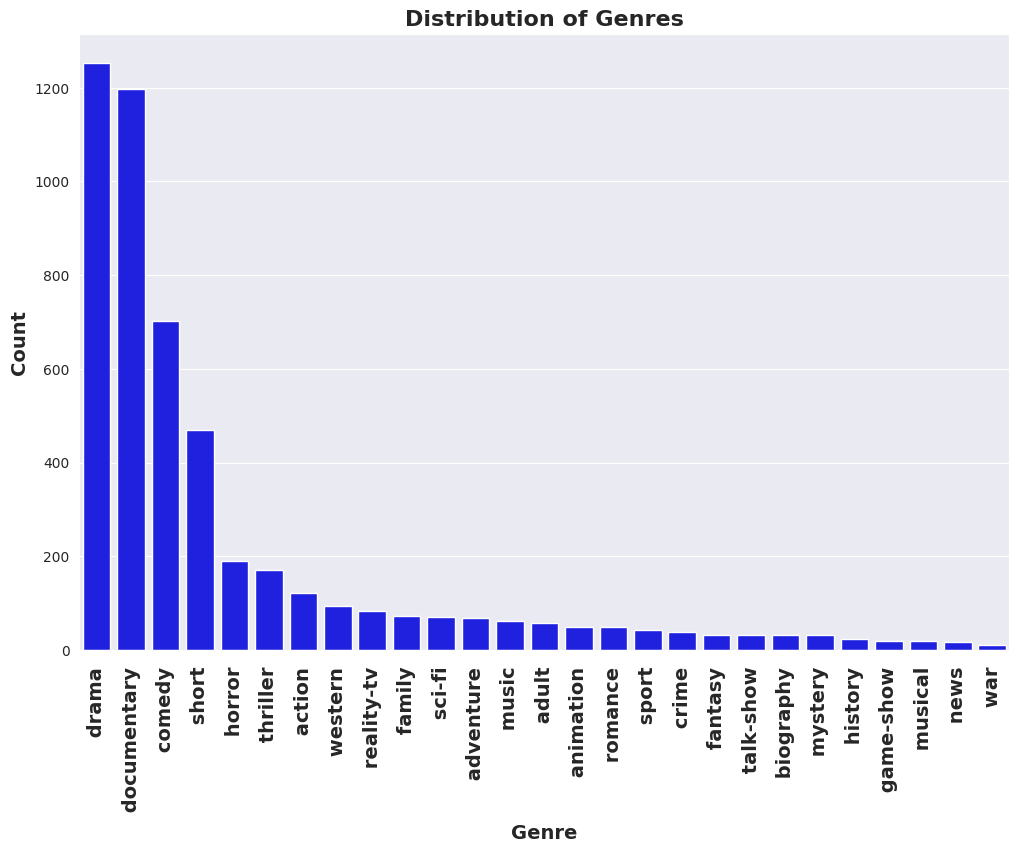

In [18]:
# Plot count plot
plt.figure(figsize=(12,8))
counts = df_train['genre'].value_counts()
sns.barplot(x=counts.index, y=counts, color='blue')
plt.xlabel('Genre' ,fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')

Text(0, 0.5, 'genre')

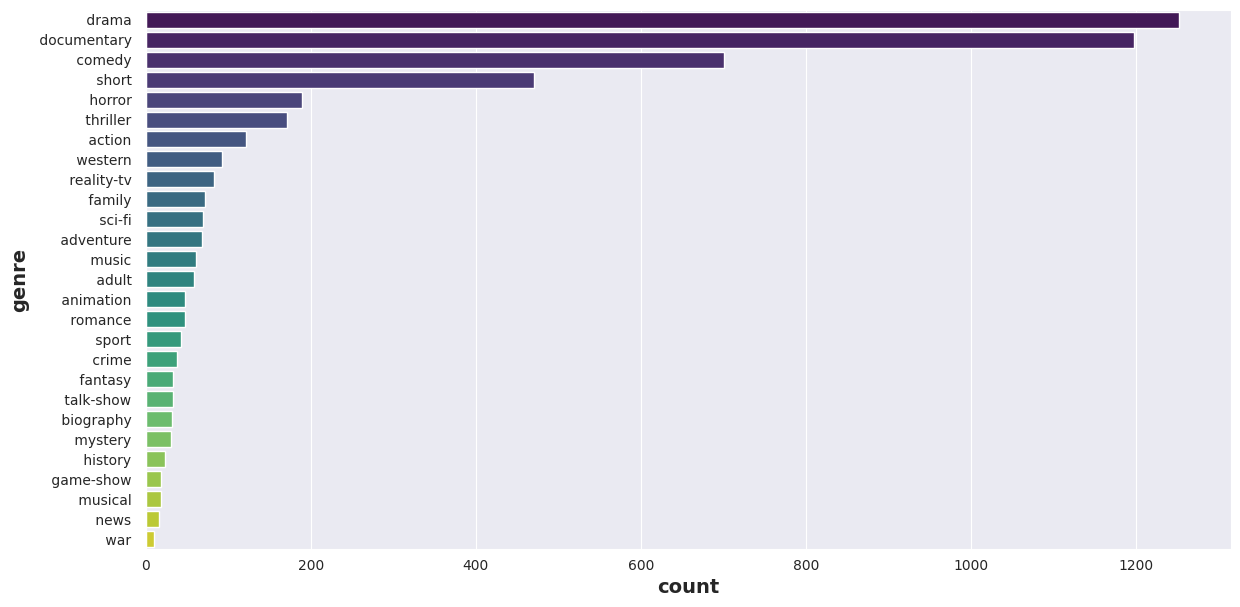

In [19]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(df_train, y= 'genre', order= df_train['genre'].value_counts().index, palette= 'viridis')
plt.xlabel('count', fontsize=14, fontweight= 'bold')
plt.ylabel('genre', fontsize=14, fontweight= 'bold')

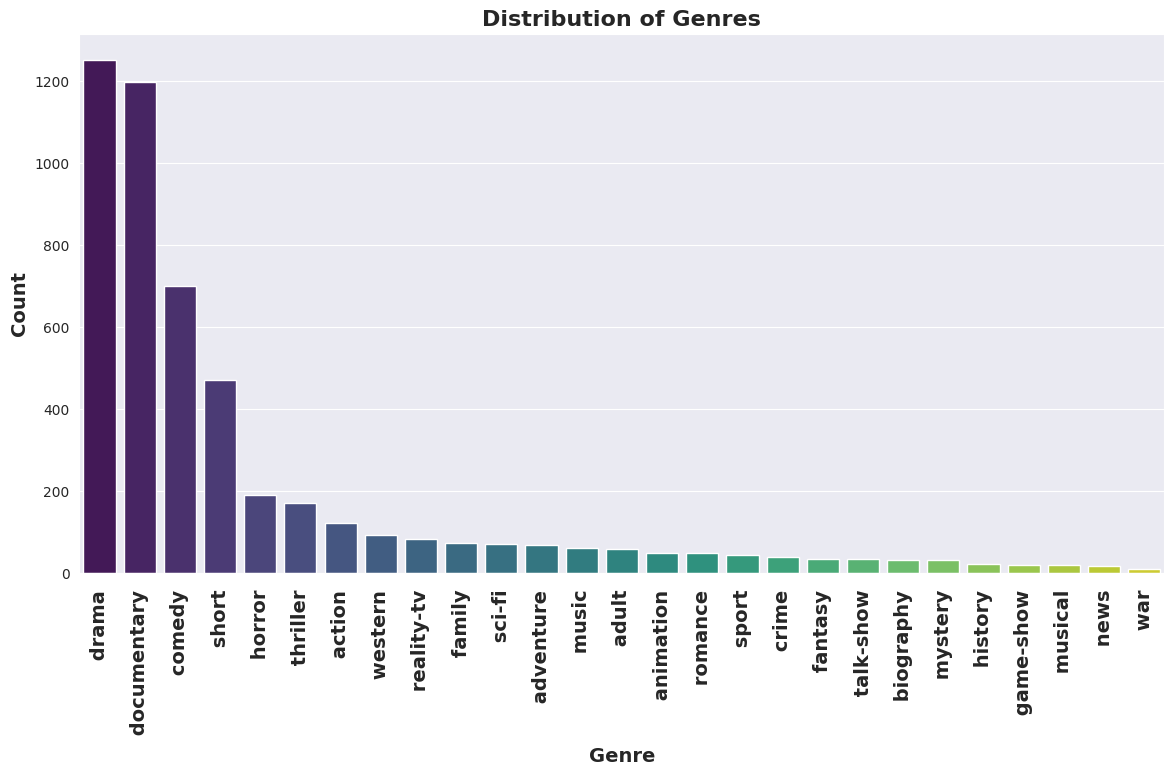

In [20]:
# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = df_train['genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

## **Predictive Analysis**

Let's start building different Machine Learning models and train them.

In [21]:
# Plotting and Checking if the data is imbalanced or not
data_bal = df_train['genre'].value_counts(normalize= True)
data_bal

 drama           0.2504
 documentary     0.2396
 comedy          0.1402
 short           0.0940
 horror          0.0378
 thriller        0.0342
 action          0.0242
 western         0.0186
 reality-tv      0.0166
 family          0.0144
 sci-fi          0.0140
 adventure       0.0136
 music           0.0122
 adult           0.0116
 animation       0.0096
 romance         0.0096
 sport           0.0086
 crime           0.0076
 fantasy         0.0066
 talk-show       0.0066
 biography       0.0064
 mystery         0.0062
 history         0.0046
 game-show       0.0038
 musical         0.0038
 news            0.0032
 war             0.0020
Name: genre, dtype: float64

### Data Preprocessing / Text Preprocessing

1. Text Cleaning:
* Remove unnecessary characters(emojis, url, html tags, punctuation, numbers, chat words)
* tokenization
* stopwords
* apply stemming or lemmatization.
2. Feature Engineering:
* Vectorization: Convert text data into numerical format using techniques like TF-IDF or CountVectorizer, which are essential for machine learning models to process text data.
* Encoding


Text Cleaning

In [22]:
# Initialize the stemmer/lemmatizer, spacy, punctuation and stop words
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')
punctuation_list = string.punctuation

# Define the clean_text function
def clean_text(text):
  text = text.lower() # Lowercase all characters
  text = re.sub('<.*?>', ' ', text) # Removing HTML tags
  text = re.sub('https?://\S+|www.\.\S+', ' ', text) # Removing URL
  text = re.sub('@\S+', ' ', text) # Removing twitter handles
  text = re.sub('.pic\S+', ' ', text)
  text = re.sub("[^a-zA-Z+']", ' ', text) # Keep only characters
  text = re.sub('\s+[a-zA-Z]\s+', ' ', text + ' ') # Keep words with length > 1 only
  text = ''.join([char for char in text if char not in punctuation_list]) # for char in punctuation_list: text = text.replace(char, ' ')
  text = ' '.join([word for word in text.split() if word not in stop_words]) # Removing Stopwords
  text = nlp(text) # Tokenization
  doc = nlp(text)
  text = ' '.join([words.lemma_ for words in doc]) # Stemming & Lemmatization
  text = re.sub(r'\s[\s]+', ' ', text).strip() # Removing repeated/leading/trailing spaces
  return text

# Apply the clean_text function to the 'Description' column in the training data and test data
df_train['cleaned_text'] = df_train['description'].apply(clean_text)
df_test['cleaned_text'] = df_test['description'].apply(clean_text)

print(df_train.head(), '\n')
print(df_test.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                title       genre  \
0       Oscar et la dame rose (2009)       drama    
1                       Cupid (1997)    thriller    
2   Young, Wild and Wonderful (1980)       adult    
3              The Secret Sin (1915)       drama    
4             The Unrecovered (2007)       drama    

                                         description  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                        cleaned_text  
0  listen conversation doctor parent year old osc...  
1  brother sister past incestuous relationship cu...  
2  bus empty student field trip museum natural hi...  
3  help unemployed father make end meet edith twi...  
4  film title refer un recover body grind zero al...   

            

In [23]:
df_train.head()

,title,genre,description,cleaned_text
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen conversation doctor parent year old osc...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refer un recover body grind zero al...


Feature Engineering

In [24]:
# Vectorization
vectorizer = TfidfVectorizer()
df_train_vectorized = vectorizer.fit_transform(df_train['cleaned_text']).toarray()
df_test_vectorized = vectorizer.fit_transform(df_test['cleaned_text']).toarray()

In [25]:
df_train_vectorized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
df_train_vectorized.shape

(5000, 28934)

In [27]:
df_test_vectorized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
df_test_vectorized.shape

(5000, 29292)

In [29]:
# Encoding
encoder = LabelEncoder()
df_train['genre'] = encoder.fit_transform(df_train['genre'])
dictgn = dict(enumerate(encoder.classes_))
print(dictgn, '\n')

print("Labels count : ", 1 + df_train.genre.max(), '\n')
df_train.head()

{0: ' action ', 1: ' adult ', 2: ' adventure ', 3: ' animation ', 4: ' biography ', 5: ' comedy ', 6: ' crime ', 7: ' documentary ', 8: ' drama ', 9: ' family ', 10: ' fantasy ', 11: ' game-show ', 12: ' history ', 13: ' horror ', 14: ' music ', 15: ' musical ', 16: ' mystery ', 17: ' news ', 18: ' reality-tv ', 19: ' romance ', 20: ' sci-fi ', 21: ' short ', 22: ' sport ', 23: ' talk-show ', 24: ' thriller ', 25: ' war ', 26: ' western '} 

Labels count :  27 



,title,genre,description,cleaned_text
0,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...,listen conversation doctor parent year old osc...
1,Cupid (1997),24,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,The Secret Sin (1915),8,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,The Unrecovered (2007),8,The film's title refers not only to the un-re...,film title refer un recover body grind zero al...


In [30]:
# Select and define features(x) and target variable(y)
x = df_train_vectorized
y = df_train['genre']

In [31]:
x[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
y[:5]

0     8
1    24
2     1
3     8
4     8
Name: genre, dtype: int64

Data Spliting

In [33]:
# Splitting the dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [34]:
# Display the shape of the training and testing sets
print('Training set shape of x: ', x_train.shape)
print('Testing set shape of x: ', x_test.shape)
print('Training set shape of y: ', y_train.shape)
print('Testing set shape of y: ', y_test.shape)

Training set shape of x:  (4000, 28934)
Testing set shape of x:  (1000, 28934)
Training set shape of y:  (4000,)
Testing set shape of y:  (1000,)


### Model Building

In [35]:
# Logistic Regression
log_reg = LogisticRegression(random_state= 42)
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
print(log_reg.score(x_train, y_train))

# Naive_Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)
print(nb_model.score(x_train, y_train))

# Neural Network
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train)
y_pred_nn = nn_model.predict(x_test)
print(nn_model.score(x_train, y_train))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
print(dt_model.score(x_train, y_train))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print(rf_model.score(x_train, y_train))

# K-Neighbors
kn_model = KNeighborsClassifier()
kn_model.fit(x_train, y_train)
y_pred_kn = kn_model.predict(x_test)
print(kn_model.score(x_train, y_train))

# SVM
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
print(svm_model.score(x_train, y_train))


0.66475
0.4895
1.0
1.0
1.0
0.557
0.86875


In [37]:
# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train, y_train)
y_pred_lgbm = lgbm_model.predict(x_test)
print(lgbm_model.score(x_train, y_train))

# XGboost
'''xgb_model = XGBClassifier()              # Required 0 to 9 unique values
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print(xgb_model.score(x_train, y_train))'''

# Catboost
'''cat_model = CatBoostClassifier(verbose= False)
cat_model.fit(x_train, y_train)
y_pred_cat = cat_model.predict(x_test)
print(cat_model.score(x_train, y_train))'''


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.213570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45599
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 1763
[LightGBM] [Info] Start training from score -3.669077
[LightGBM] [Info] Start training from score -4.443902
[LightGBM] [Info] Start training from score -4.268698
[LightGBM] [Info] Start training from score -4.605170
[LightGBM] [Info] Start training from score -4.961845
[LightGBM] [Info] Start training from score -1.960770
[LightGBM] [Info] Start training from score -4.926754
[LightGBM] [Info] Start training from score -1.429202
[LightGBM] [Info] Start training from score -1.391307
[LightGBM] [Info] Start training from score -4.268698
[LightGBM] [Info] Start training from score -5.249527
[LightGBM] [Info] Start training from score -5.5214

'cat_model = CatBoostClassifier(verbose= False)\ncat_model.fit(x_train, y_train)\ny_pred_cat = cat_model.predict(x_test)\nprint(cat_model.score(x_train, y_train))'

### Model Evaluation

Logistic Regression

In [48]:
# Logistic Regression
print('The performance evaluation of Logistic Regression Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_log), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_log, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_log, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_log, average='micro'), '\n')

The performance evaluation of Logistic Regression Model is below:  

Accuracy Score:  0.489 

Precision Score:  0.489 

F1 Score:  0.489 

Recall Score:  0.489 



Naive_Bayes

In [49]:
# Naive_Bayes
print('The performance evaluation of Naive_Bayes Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_nb), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_nb, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_nb, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_nb, average='micro'), '\n')

The performance evaluation of Naive_Bayes Model is below:  

Accuracy Score:  0.439 

Precision Score:  0.439 

F1 Score:  0.439 

Recall Score:  0.439 



Neural Network

In [50]:
# Neural Network
print('The performance evaluation of Logistic Regression Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_nn), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_nn, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_nn, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_nn, average='micro'), '\n')

The performance evaluation of Logistic Regression Model is below:  

Accuracy Score:  0.523 

Precision Score:  0.523 

F1 Score:  0.523 

Recall Score:  0.523 



Decision Tree Model

In [51]:
# Decision Tree
print('The performance evaluation of Decision Tree Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_dt), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_dt, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_dt, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_dt, average='micro'), '\n')

The performance evaluation of Decision Tree Model is below:  

Accuracy Score:  0.336 

Precision Score:  0.336 

F1 Score:  0.336 

Recall Score:  0.336 



Random Forest

In [52]:
# Random Forest
print('The performance evaluation of Random Forest Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_rf), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_rf, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_rf, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_rf, average='micro'), '\n')

The performance evaluation of Random Forest Model is below:  

Accuracy Score:  0.451 

Precision Score:  0.451 

F1 Score:  0.451 

Recall Score:  0.451 



K-Neighbors

In [53]:
# K-Neighbors
print('The performance evaluation of K-Neighbors Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_kn), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_kn, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_kn, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_kn, average='micro'), '\n')

The performance evaluation of K-Neighbors Model is below:  

Accuracy Score:  0.373 

Precision Score:  0.373 

F1 Score:  0.373 

Recall Score:  0.373 



SVM

In [54]:
# SVM
print('The performance evaluation of SVM Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_svm), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_svm, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_svm, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_svm, average='micro'), '\n')

The performance evaluation of SVM Model is below:  

Accuracy Score:  0.465 

Precision Score:  0.465 

F1 Score:  0.465 

Recall Score:  0.465 



LightGBM

In [55]:
# LightGBM
print('The performance evaluation of LightGBM Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_lgbm), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_lgbm, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_lgbm, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_lgbm, average='micro'), '\n')

The performance evaluation of LightGBM Model is below:  

Accuracy Score:  0.499 

Precision Score:  0.499 

F1 Score:  0.499 

Recall Score:  0.499 



XGboost

In [ ]:
# XGboost
'''print('The performance evaluation of XGboost Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_xgb), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_xgb, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_xgb, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_xgb, average='micro'), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_xgb), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_xgb), '\n')'''

Catboost

In [ ]:
# Catboost
'''print('The performance evaluation of Catboost Model is below: ', '\n')
print('Accuracy Score: ', accuracy_score(y_test, y_pred_cat), '\n')
print('Precision Score: ', precision_score(y_test, y_pred_cat, average='micro'), '\n')
print('F1 Score: ', f1_score(y_test, y_pred_cat, average='micro'), '\n')
print('Recall Score: ', recall_score(y_test, y_pred_cat, average='micro'), '\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, y_pred_cat), '\n')
print('Classification Report: ', '\n', classification_report(y_test, y_pred_cat), '\n')'''

.

Actual Output vs Predicted Output

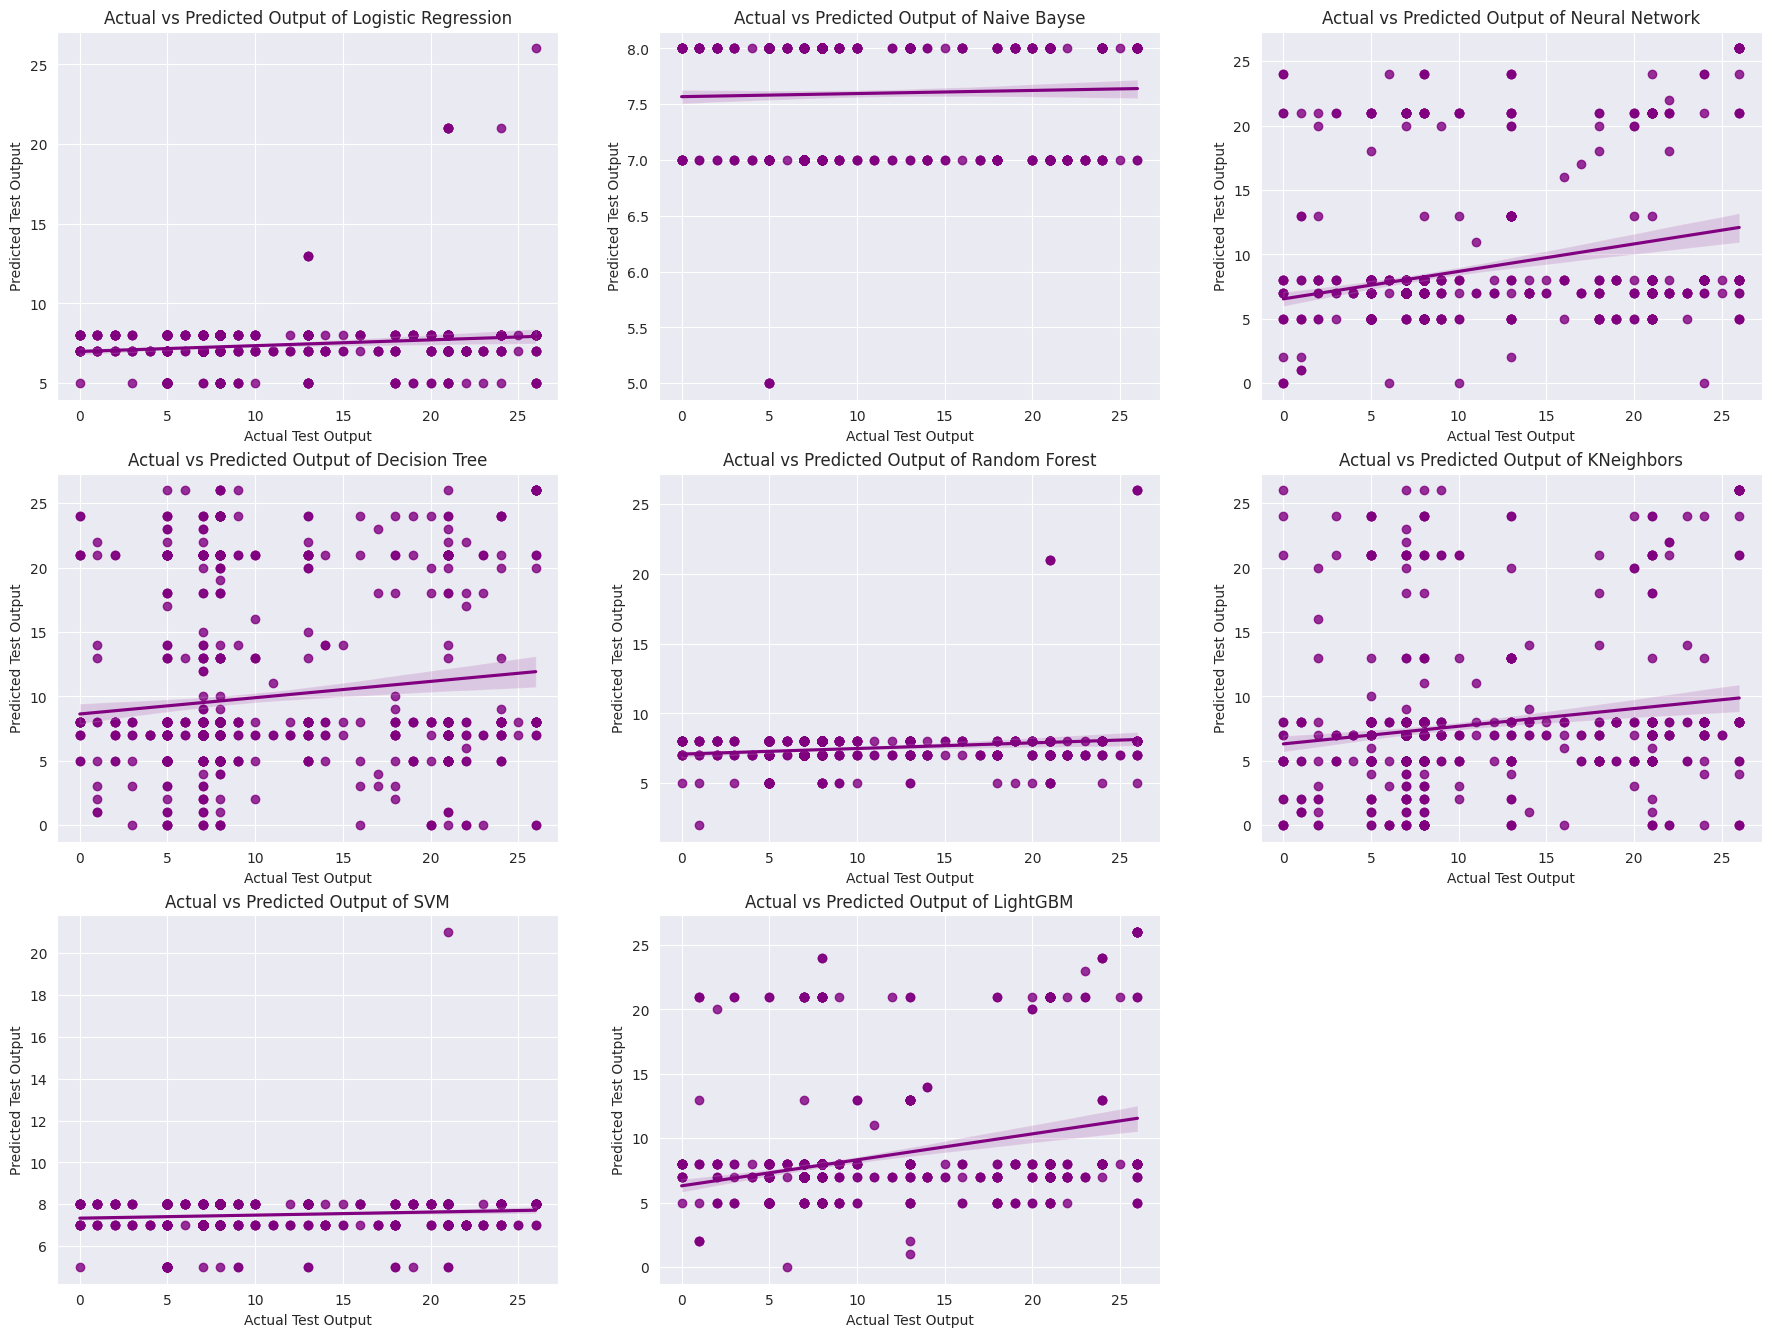

In [57]:
predictions = [y_pred_log, y_pred_nb, y_pred_nn, y_pred_dt, y_pred_rf, y_pred_kn, y_pred_svm, y_pred_lgbm]
classifiers_name = ['Logistic Regression', 'Naive Bayse', 'Neural Network', 'Decision Tree', 'Random Forest',
               'KNeighbors', 'SVM', 'LightGBM']

plt.figure(figsize= (22,22))
for i, pred in enumerate(predictions):
  plt.subplot(4,3,i+1)
  sns.regplot(x= y_test, y= pred, color= 'purple')
  plt.title(f'Actual vs Predicted Output of {classifiers_name[i]}')
  plt.xlabel('Actual Test Output')
  plt.ylabel('Predicted Test Output')

### Model Testing / Predictions on the Test Data

In [ ]:
# Use the trained model to make predictions on the test data
df_test_pred = nb_model.predict(df_test_vectorized)
df_test['predicted genre'] = encoder.inverse_transform(df_test_pred)

In [63]:
# Writing Steps in a model to fiting them using Pipeline
clf = Pipeline([('vectorizer', TfidfVectorizer()), ('nb', MultinomialNB())])    # Neural Network gives good result

# training the model
clf.fit(df_train.cleaned_text, df_train.genre)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('nb', MultinomialNB())])

In [64]:
# Predicting manual

Descriptions = [
    "Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.",
    "In tough economic times Max and Joey have all but run out of ideas until, they discover that senior housing is cheap. Not only that but Max's aunt just kicked the bucket and no one knows yet. In a hilarious series that always keeps you on your toes, the two friends take us on a cross-dressing, desperate and endearing ride through being broke."
]

print('Prediction: ', encoder.inverse_transform(clf.predict(Descriptions)))

Prediction:  [' drama ' ' drama ']


In [72]:
# GUI
import ipywidgets as widgets
from IPython.display import display

# Define a function to be called when the button is clicked
def button_click_search(b):
  text_value = text_box.value
  text_value = [text_value]  # Convert the text value to a list
  print("Film's GENRE is : ", encoder.inverse_transform(clf.predict(text_value)))

# Create button and text box widgets
button = widgets.Button(description= 'PREDICT')
text_box = widgets.Text(placeholder= 'Enter description')
text_box.layout.width = '500px'
text_box.layout.height = '30px'

# Attach the function to the button click event
button.on_click(button_click_search)

# Display the widgets
display(text_box)
display(button)

Text(value='', layout=Layout(height='30px', width='500px'), placeholder='Enter description')

Button(description='PREDICT', style=ButtonStyle())

In [70]:
df_test['description'].iloc[:1].values

array([" L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa."],
      dtype=object)

In [71]:
df_test.head()

,title,genre,description,cleaned_text
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",r brane love life car apartment job especially...
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belong w...
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,one year life albin family shepherd north tran...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",father die have not speak brother year serious...
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...,know internationally martial art superstar bru...
